In [459]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
import scipy.linalg as linalg
import sklearn as skl 
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.colors as cm 

In [461]:
fichier = pd.read_csv("Matchs_WTA.csv")
c=fichier.columns
n=fichier.index.size
print("\nLe nombre de joueuses étudiées est :",n)
m=fichier.columns.size
print("\nIl a ",m," variables, qui sont : ",c)


Le nombre de joueuses étudiées est : 2900

Il a  50  variables, qui sont :  Index(['index', 'tourney_id', 'tourney_name', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank',
       'winner_rank_points', 'loser_id', 'loser_seed', 'loser_entry',
       'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
       'loser_rank', 'loser_rank_points', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced'],
      dtype='object')



--- Étude de la variable surface ---

Tableau des effectifs/fréquences des surfaces : 
          effectifs  fréquences
surface                       
Hard           803    0.276897
Clay           261    0.090000
Grass          135    0.046552


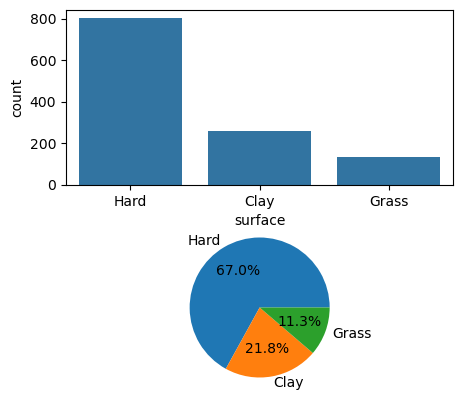

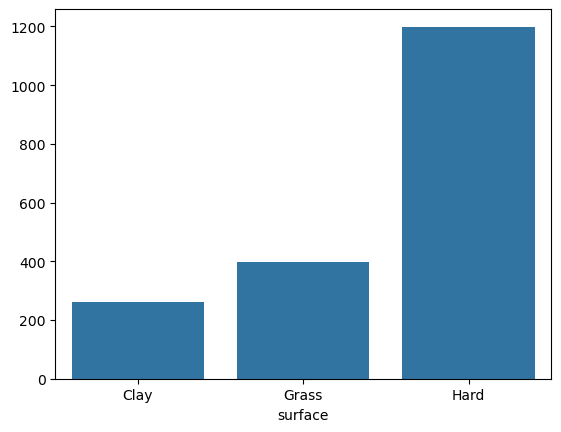

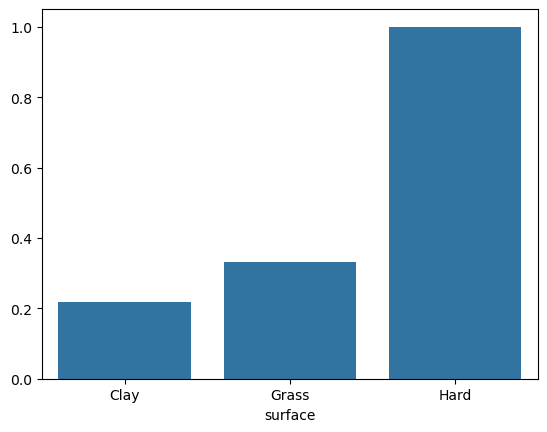

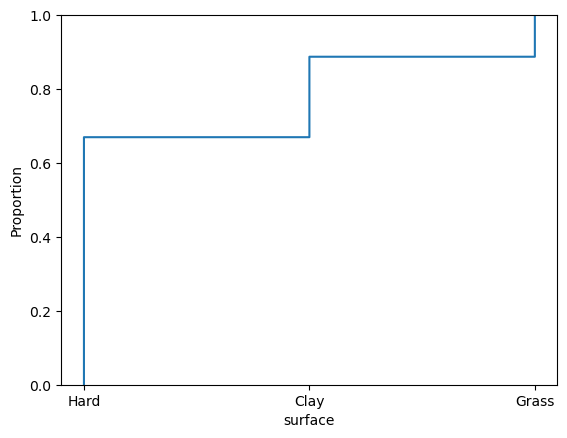

<function matplotlib.pyplot.show(close=None, block=None)>

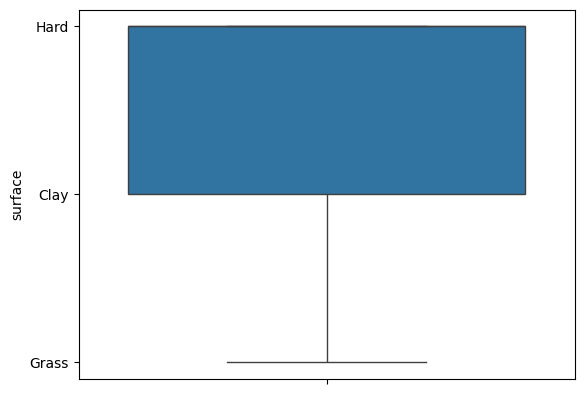

In [473]:
# Étude de la variable surface

print("\n--- Étude de la variable surface ---")

surface_eff=fichier["surface"].value_counts() #effectifs
surface_fre=surface_eff/n  #fréquence
fichier["surface"].value_counts().sort_index()

surface_df=pd.concat([surface_eff, surface_fre], axis=1)  #affichage des fréquences et effectifs
surface_df.columns = ["effectifs", "fréquences"]
print("\nTableau des effectifs/fréquences des surfaces : \n",surface_df)  #suite et fin 

#diagrammes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,5))  #diagramme baton effectifs 
sns.countplot(x=fichier["surface"], stat="count", ax=axs[0]) #idem, suite 

axs[1].pie(surface_eff, labels=surface_eff.index, autopct="%1.1f%%") #camembert, autopct fait apparaître les %
plt.show()

surface_cumulé_eff=fichier["surface"].value_counts().sort_index().cumsum()  #cf diagrammes effectis cumulés
surface_cumulé_fre=fichier["surface"].value_counts(normalize=True).sort_index().cumsum() #cf diagramme fréquences cumulées 
sns.barplot(x=surface_cumulé_eff.index, y=surface_cumulé_eff.values) #diagramme batons effectifs cumulés
plt.show()
sns.barplot(x=surface_cumulé_fre.index, y=surface_cumulé_fre.values) #diagramme batons fréquence cumulées
plt.show()

sns.ecdfplot(fichier["surface"]) #fonction de répartition empirique 
plt.show()

sns.boxplot(fichier["surface"], whis=1.5)#boxplot ou boîte à moustache 
plt.show


--- Étude de la variable w_ace ---

Tableau des effectifs/fréquences des w_ace :
        effectifs  fréquences
w_ace                       
0.0          178    0.061379
1.0          210    0.072414
2.0          205    0.070690
3.0          176    0.060690
4.0          123    0.042414
5.0           86    0.029655
6.0           65    0.022414
7.0           44    0.015172
8.0           28    0.009655
9.0           27    0.009310
10.0           9    0.003103
11.0          12    0.004138
12.0          11    0.003793
13.0           7    0.002414
14.0           7    0.002414
15.0           4    0.001379
16.0           3    0.001034
17.0           1    0.000345
18.0           1    0.000345
20.0           1    0.000345
21.0           1    0.000345

Quartile 1, médiane et quartile 3 pour w_ace :  1.0 , 3.0 , 5.0 soit un écart interquartile de 4.0

La moyenne est 3.30442035029191 , avec pour minimum et maximum 0.0 et 21.0 soit une étendue de 21.0

Le mode de w_ace est : [1.]

La variance et l'éc

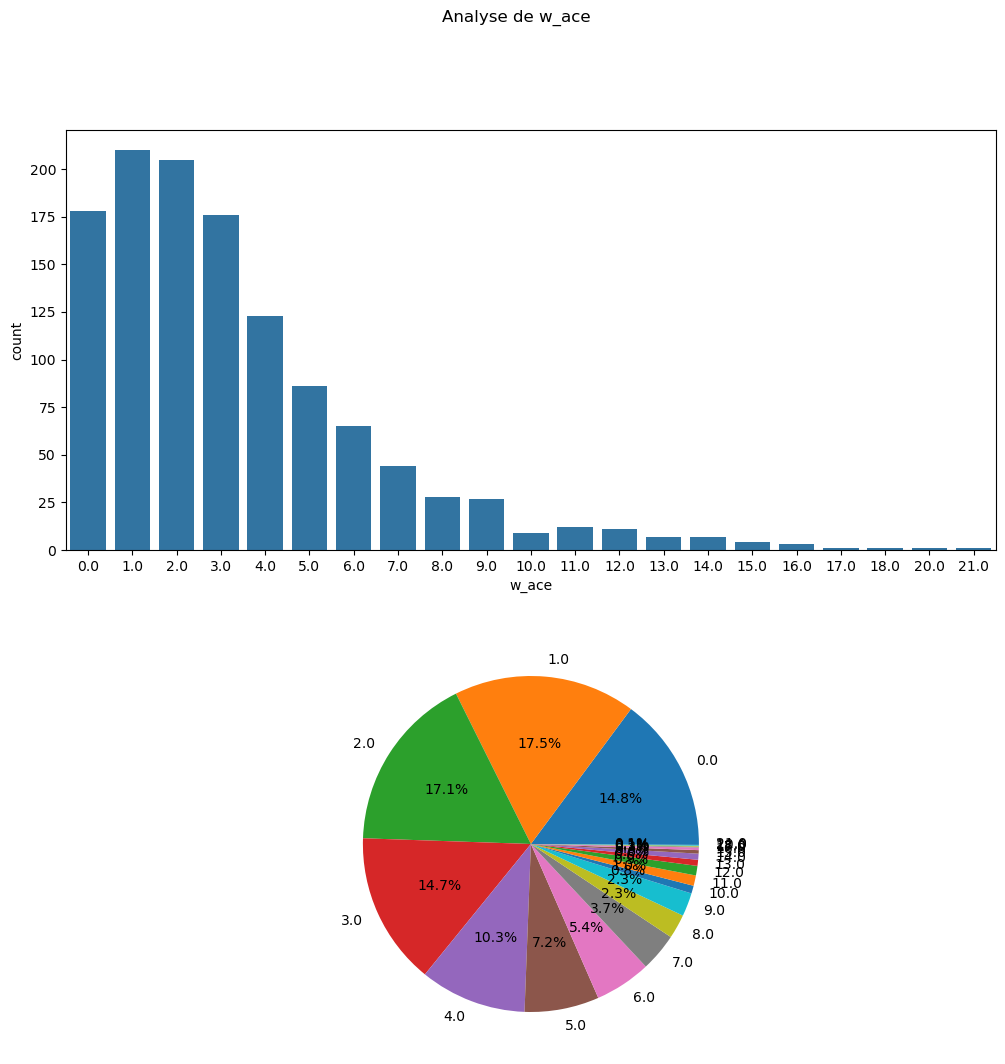

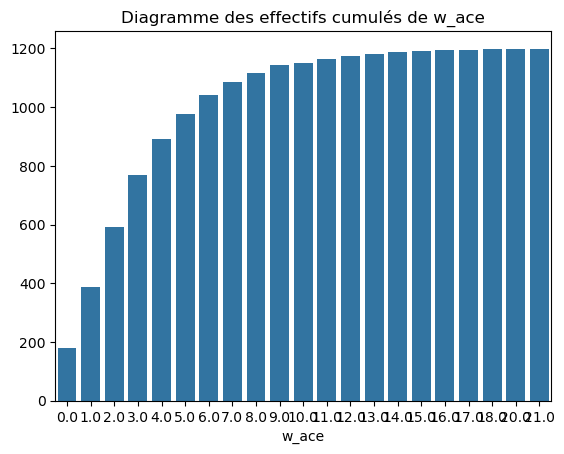

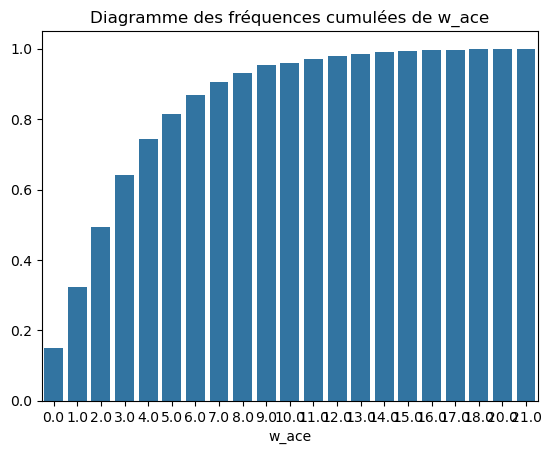

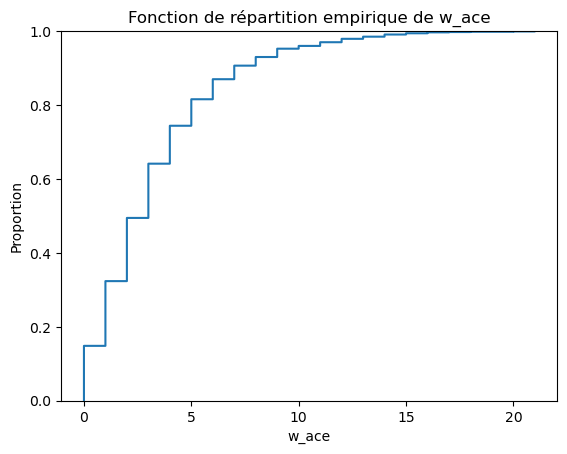

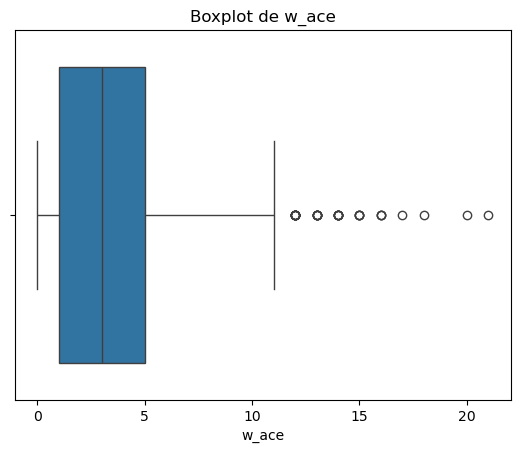

In [475]:
# Étude de la variable w_ace

print("\n--- Étude de la variable w_ace ---")

# Tableau des effectifs et fréquences
wace_eff = fichier["w_ace"].value_counts().sort_index()
wace_fre = wace_eff / n
wace_df = pd.concat([wace_eff, wace_fre], axis=1)
wace_df.columns = ["effectifs", "fréquences"]
print("\nTableau des effectifs/fréquences des w_ace :\n", wace_df)

# Analyses
quart1_wace = fichier["w_ace"].quantile(0.25)
mediane_wace = fichier["w_ace"].median()
quart3_wace = fichier["w_ace"].quantile(0.75)
interquart_wace = quart3_wace - quart1_wace
print("\nQuartile 1, médiane et quartile 3 pour w_ace : ", 
      quart1_wace, ",", mediane_wace, ",", quart3_wace, 
      "soit un écart interquartile de", interquart_wace)

min_wace = fichier["w_ace"].min()
max_wace = fichier["w_ace"].max()
moy_wace = fichier["w_ace"].mean()
etendu_wace = max_wace - min_wace
print("\nLa moyenne est", moy_wace, 
      ", avec pour minimum et maximum", min_wace, "et", max_wace, 
      "soit une étendue de", etendu_wace)

mode_wace = fichier["w_ace"].mode()
print("\nLe mode de w_ace est :", mode_wace.values)

ET_wace = fichier["w_ace"].std(ddof=0)
var_wace = fichier["w_ace"].var(ddof=0)
print("\nLa variance et l'écart-type de w_ace sont respectivement :", var_wace, "et", ET_wace)

# Diagrammes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
sns.countplot(x=fichier["w_ace"], ax=axs[0])
axs[1].pie(wace_eff, labels=wace_eff.index, autopct="%1.1f%%")
plt.suptitle("Analyse de w_ace")
plt.show()

wace_cum_eff = wace_eff.sort_index().cumsum()
wace_cum_fre = fichier["w_ace"].value_counts(normalize=True).sort_index().cumsum()
sns.barplot(x=wace_cum_eff.index, y=wace_cum_eff.values)
plt.title("Diagramme des effectifs cumulés de w_ace")
plt.show()

sns.barplot(x=wace_cum_fre.index, y=wace_cum_fre.values)
plt.title("Diagramme des fréquences cumulées de w_ace")
plt.show()

sns.ecdfplot(fichier["w_ace"])
plt.title("Fonction de répartition empirique de w_ace")
plt.show()

sns.boxplot(x=fichier["w_ace"], whis=1.5)
plt.title("Boxplot de w_ace")
plt.show()


--- Étude de la variable minutes ---

Tableau des effectifs/fréquences des minutes :
          effectifs  fréquences
minutes                       
0.0              6    0.002069
33.0             1    0.000345
37.0             1    0.000345
38.0             1    0.000345
40.0             1    0.000345
...            ...         ...
188.0            1    0.000345
189.0            1    0.000345
194.0            1    0.000345
199.0            1    0.000345
218.0            1    0.000345

[149 rows x 2 columns]

Quartile 1, médiane et quartile 3 pour minutes :  70.0 , 85.0 , 112.0 soit un écart interquartile de 42.0

La moyenne est 92.46314907872697 , avec pour minimum et maximum 0.0 et 218.0 soit une étendue de 218.0

Le mode de minutes est : [72.]

La variance et l'écart-type de minutes sont respectivement : 997.1548396645428 et 31.577758623191464


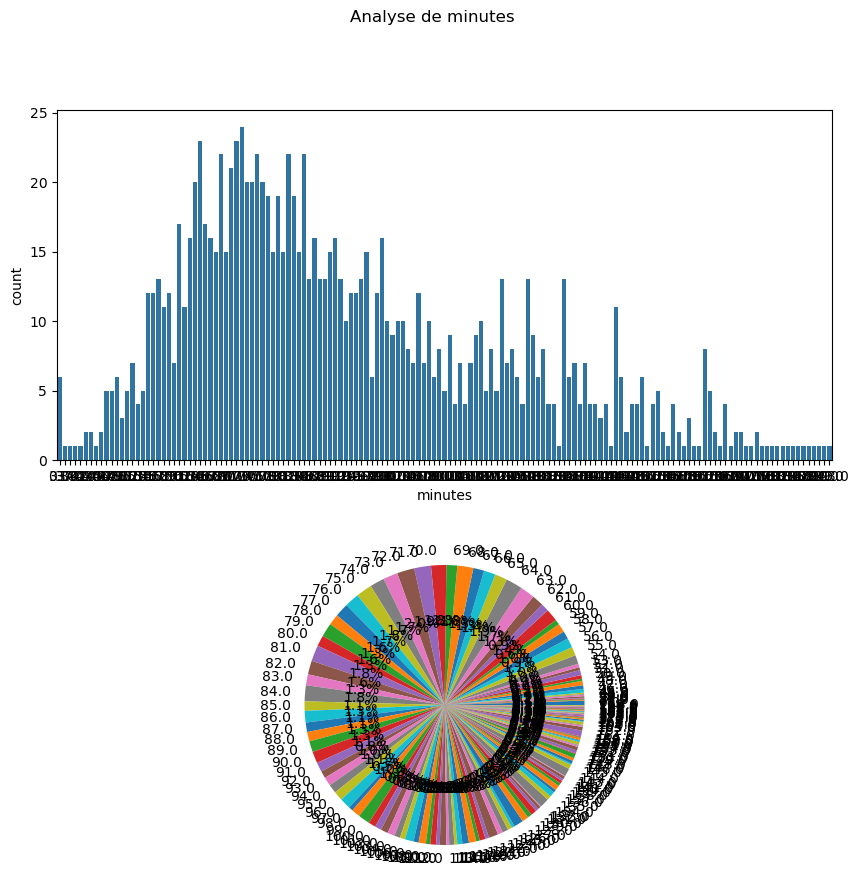

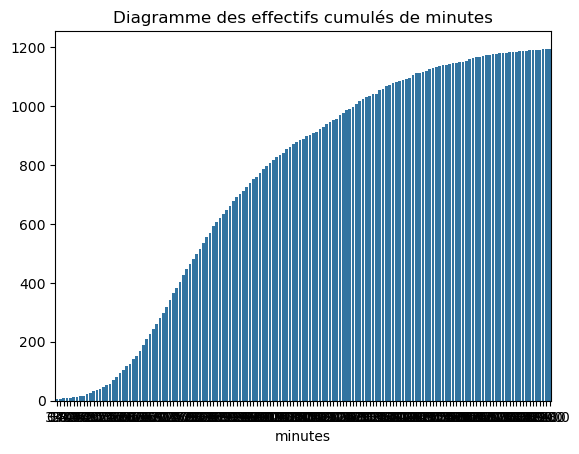

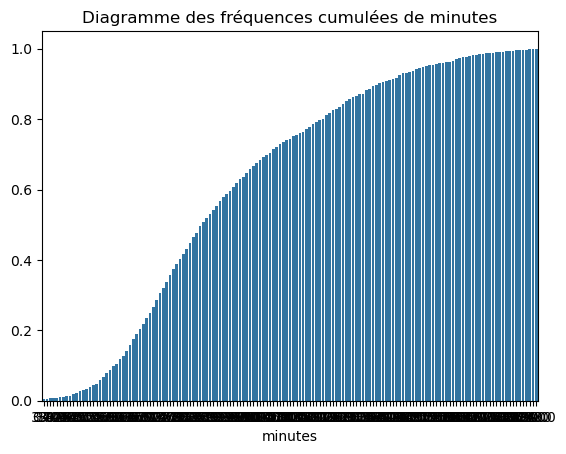

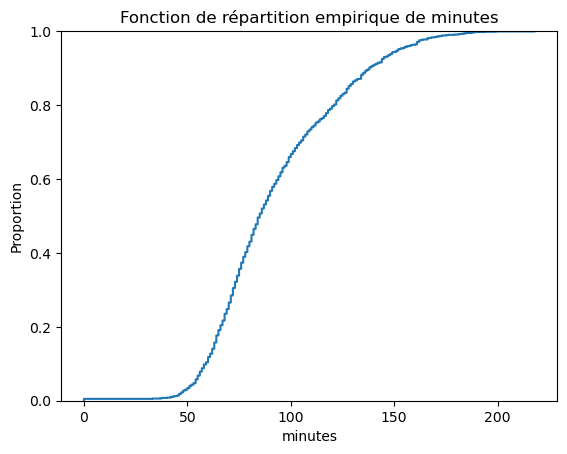

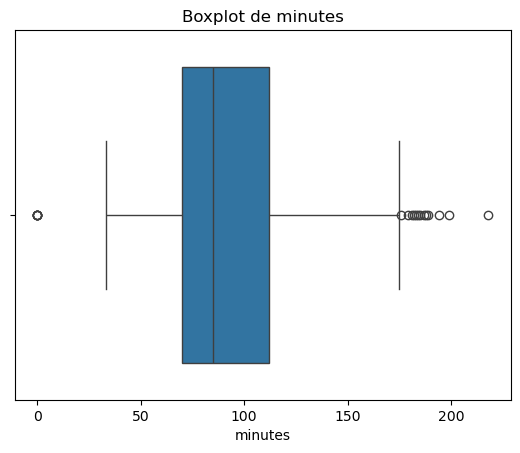

In [477]:
# Étude de la variable minutes

print("\n--- Étude de la variable minutes ---")

# Tableau des effectifs et fréquences
minutes_eff = fichier["minutes"].value_counts().sort_index()
minutes_fre = minutes_eff / n
minutes_df = pd.concat([minutes_eff, minutes_fre], axis=1)
minutes_df.columns = ["effectifs", "fréquences"]
print("\nTableau des effectifs/fréquences des minutes :\n", minutes_df)

# Analyses
quart1_minutes = fichier["minutes"].quantile(0.25)
mediane_minutes = fichier["minutes"].quantile(0.5)
quart3_minutes = fichier["minutes"].quantile(0.75)
interquart_minutes = quart3_minutes - quart1_minutes
print("\nQuartile 1, médiane et quartile 3 pour minutes : ", 
      quart1_minutes, ",", mediane_minutes, ",", quart3_minutes, 
      "soit un écart interquartile de", interquart_minutes)

min_minutes = fichier["minutes"].min()
max_minutes = fichier["minutes"].max()
moy_minutes = fichier["minutes"].mean()
etendu_minutes = max_minutes - min_minutes
print("\nLa moyenne est", moy_minutes, 
      ", avec pour minimum et maximum", min_minutes, "et", max_minutes, 
      "soit une étendue de", etendu_minutes)

mode_minutes = fichier["minutes"].mode()
print("\nLe mode de minutes est :", mode_minutes.values)

ET_minutes = fichier["minutes"].std(ddof=0)
var_minutes = fichier["minutes"].var(ddof=0)
print("\nLa variance et l'écart-type de minutes sont respectivement :", var_minutes, "et", ET_minutes)

# Diagrammes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
sns.countplot(x=fichier["minutes"], ax=axs[0])
axs[1].pie(minutes_eff, labels=minutes_eff.index, autopct="%1.1f%%")
plt.suptitle("Analyse de minutes")
plt.show()

minutes_cum_eff = minutes_eff.sort_index().cumsum()
minutes_cum_fre = fichier["minutes"].value_counts(normalize=True).sort_index().cumsum()
sns.barplot(x=minutes_cum_eff.index, y=minutes_cum_eff.values)
plt.title("Diagramme des effectifs cumulés de minutes")
plt.show()

sns.barplot(x=minutes_cum_fre.index, y=minutes_cum_fre.values)
plt.title("Diagramme des fréquences cumulées de minutes")
plt.show()

sns.ecdfplot(fichier["minutes"])
plt.title("Fonction de répartition empirique de minutes")
plt.show()

sns.boxplot(x=fichier["minutes"], whis=1.5)
plt.title("Boxplot de minutes")
plt.show()


--- Étude de la variable seed (winner_seed) ---
Quartile 1, médiane et quartile 3 pour winner_seed : 3.0 , 6.0 , 10.0

Quartile 1, médiane et quartile 3 pour winner_seed :  3.0 , 6.0 , 10.0 soit un écart interquartile de 7.0

La moyenne est 7.539616346955796 , avec pour minimum et maximum 1.0 et 32.0 soit une étendue de 31.0

Le mode de winner_seed est : [1.]

La variance et l'écart-type de winner_seed sont respectivement : 40.53533629984875 et 6.366736707281741


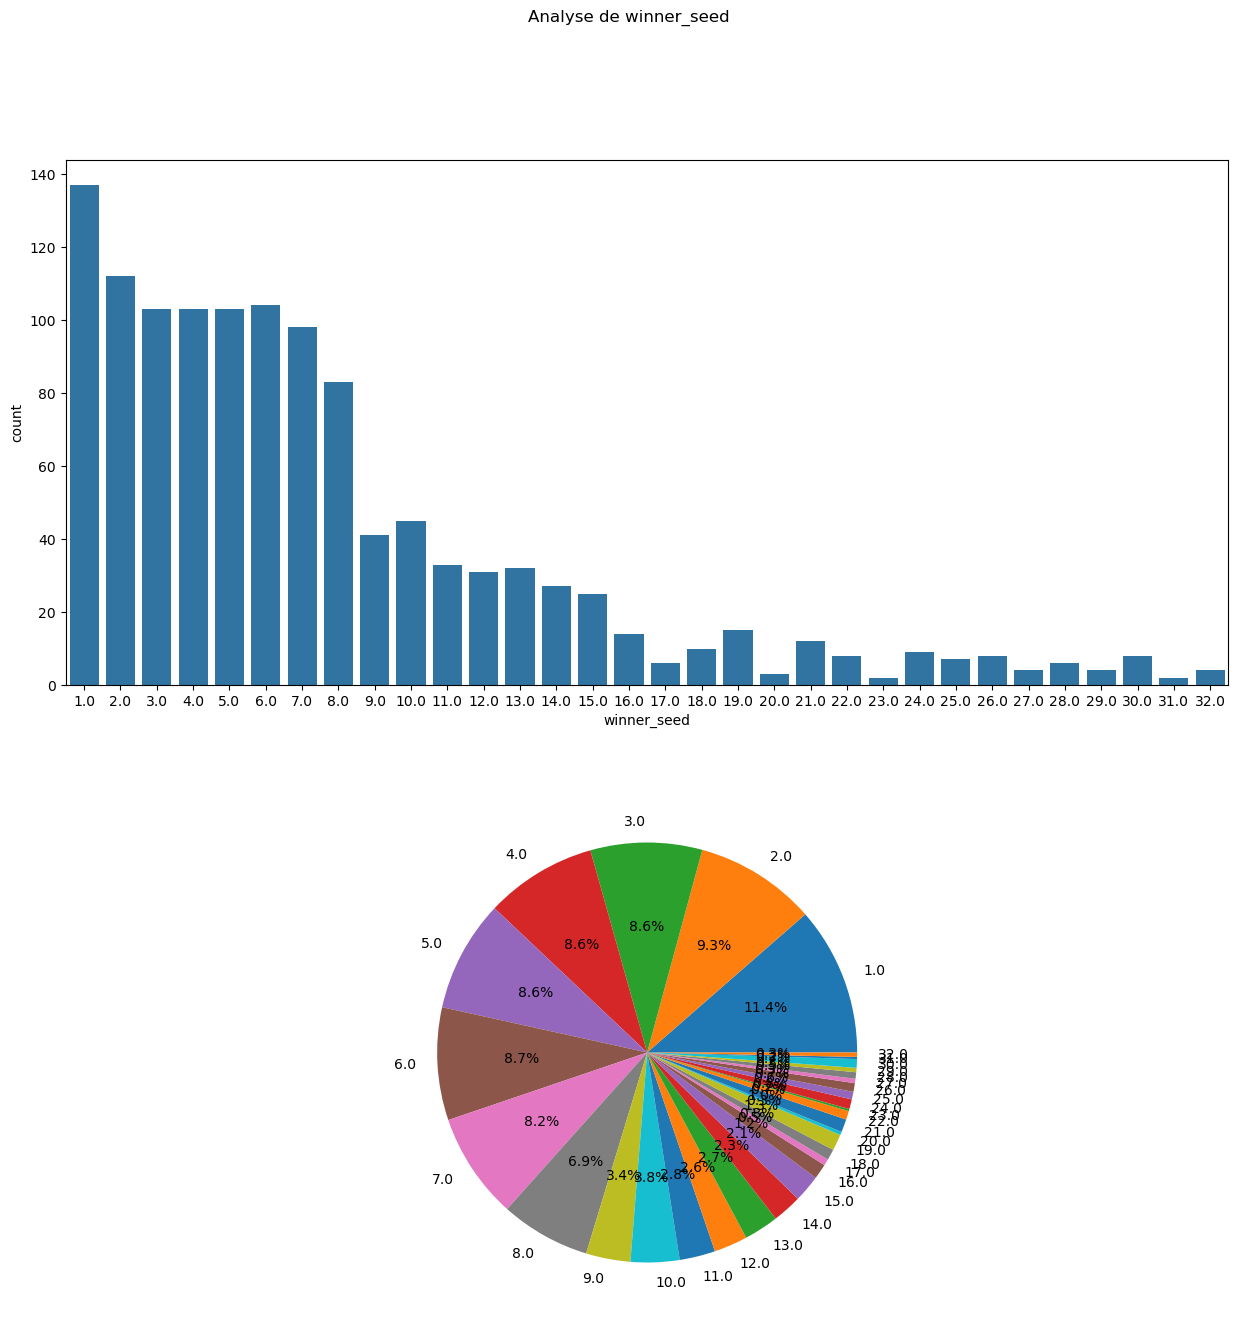

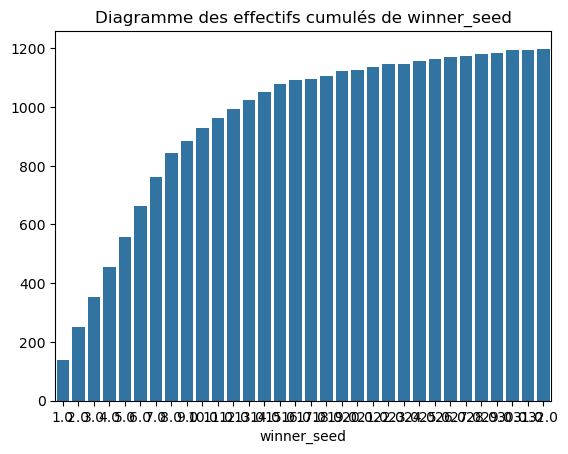

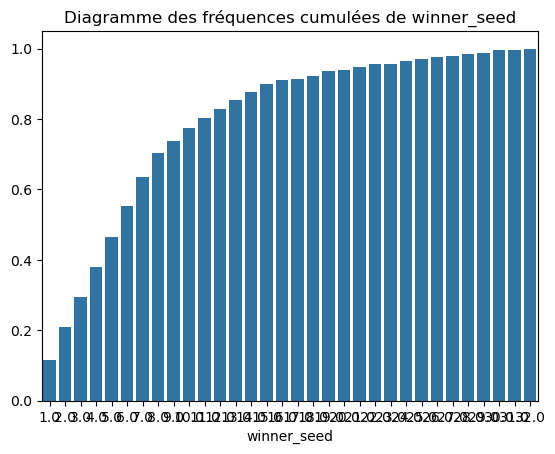

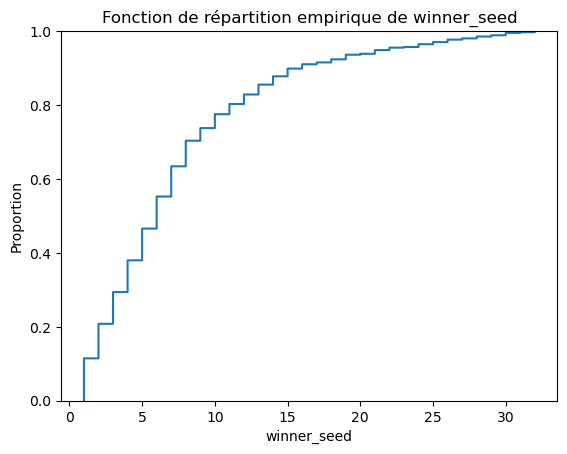

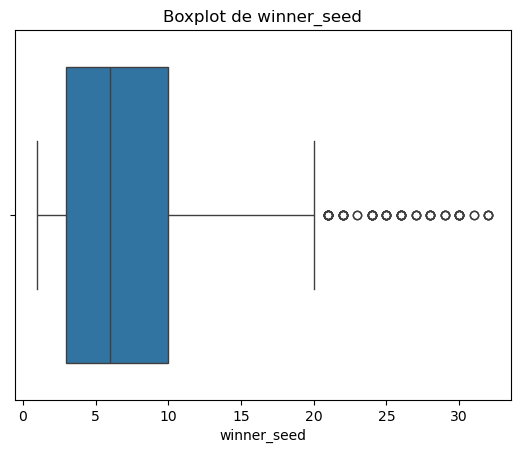

In [471]:
# Étude de la variable seed (winner_seed)


print("\n--- Étude de la variable seed (winner_seed) ---")
# Convertir la série 'winner_seed' en numérique, pour les Q, qui n'ont pas de numéros, juste une lettre 
fichier['winner_seed'] = pd.to_numeric(fichier['winner_seed'], errors='coerce')
seed_eff = fichier["winner_seed"].value_counts().sort_index()
seed_fre = seed_eff/n

# Supprimer les lignes avec des valeurs incor
fichier = fichier.dropna(subset=['winner_seed'])

# Maintenant vous pouvez calculer les quantiles sans erreurs
quart1_seed = fichier["winner_seed"].quantile(0.25)
mediane_seed = fichier["winner_seed"].median()
quart3_seed = fichier["winner_seed"].quantile(0.75)

print(f"Quartile 1, médiane et quartile 3 pour winner_seed : {quart1_seed} , {mediane_seed} , {quart3_seed}")
interquart_seed = quart3_seed - quart1_seed
print("\nQuartile 1, médiane et quartile 3 pour winner_seed : ", 
      quart1_seed, ",", mediane_seed, ",", quart3_seed, 
      "soit un écart interquartile de", interquart_seed)

min_seed = fichier["winner_seed"].min()
max_seed = fichier["winner_seed"].max()
moy_seed = fichier["winner_seed"].mean()
etendu_seed = max_seed - min_seed
print("\nLa moyenne est", moy_seed, 
      ", avec pour minimum et maximum", min_seed, "et", max_seed, 
      "soit une étendue de", etendu_seed)

mode_seed = fichier["winner_seed"].mode()
print("\nLe mode de winner_seed est :", mode_seed.values)

ET_seed = fichier["winner_seed"].std(ddof=0)
var_seed = fichier["winner_seed"].var(ddof=0)
print("\nLa variance et l'écart-type de winner_seed sont respectivement :", var_seed, "et", ET_seed)

# Diagrammes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
sns.countplot(x=fichier["winner_seed"], ax=axs[0])
axs[1].pie(seed_eff, labels=seed_eff.index, autopct="%1.1f%%")
plt.suptitle("Analyse de winner_seed")
plt.show()

seed_cum_eff = seed_eff.sort_index().cumsum()
seed_cum_fre = fichier["winner_seed"].value_counts(normalize=True).sort_index().cumsum()
sns.barplot(x=seed_cum_eff.index, y=seed_cum_eff.values)
plt.title("Diagramme des effectifs cumulés de winner_seed")
plt.show()

sns.barplot(x=seed_cum_fre.index, y=seed_cum_fre.values)
plt.title("Diagramme des fréquences cumulées de winner_seed")
plt.show()

sns.ecdfplot(fichier["winner_seed"])
plt.title("Fonction de répartition empirique de winner_seed")
plt.show()

sns.boxplot(x=fichier["winner_seed"], whis=1.5)
plt.title("Boxplot de winner_seed")
plt.show()